# 1.Importando librerias

In [161]:
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [162]:
import pandas as pd
import numpy as np
import io

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [164]:
%matplotlib inline

In [165]:
import datetime
import warnings
warnings.filterwarnings('ignore')

# 2.Lectura csv en drive

In [166]:
#@title conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#@title carga de los csv y guardarlos en una variable

listings_airbnb_2023 = pd.read_csv('/content/drive/MyDrive/Hosting/Hosting/Analisis Scrapping/DF 2023 y DF 2024/df_airbnb2023.csv', na_filter=True, keep_default_na=True, encoding='utf-16', error_bad_lines=False)
listings_airbnb_2024 = pd.read_csv('/content/drive/MyDrive/Hosting/Hosting/Analisis Scrapping/DF 2023 y DF 2024/df_airbnb2024.csv', na_filter=True, keep_default_na=True, encoding='utf-16', error_bad_lines=False,decimal=',') # Ajuste para manejar comas como separadores decimales
listings_airbnb_original = pd.read_csv('/content/drive/MyDrive/Hosting/Hosting/Analisis Dataset/DATASET LIMPIO/df_hosting_limpio.csv', na_filter=True, keep_default_na=True, encoding='ISO-8859-1', error_bad_lines=False)


# 3.Normalizar columnas

In [168]:
#@title verificar la columna
print("Columnas en df original:")
print(listings_airbnb_original.columns)

print("\nColumnas en df 23:")
print(listings_airbnb_2023.columns)

print("\nColumnas en df 24:")
print(listings_airbnb_2024.columns)



Columnas en df original:
Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'is_instant_bookable',
       'reviews_per_month', 'country', 'city', 'insert_date', 'price_cat',
       'bedrooms_cat', 'bathrooms_cat', 'beds_cat', 'dias_reservado',
       'rentabilidad', 'last_review_month', 'last_review_year', 'rango_precio',
       'month', 

In [169]:
print("Columnas en df original:")
print(listings_airbnb_original.info())

print("\nColumnas en df 23:")
print(listings_airbnb_2023.info())
print("\nColumnas en df 24:")
print(listings_airbnb_2024.info())

Columnas en df original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 8796 non-null   int64  
 1   md5                          8796 non-null   object 
 2   name                         8788 non-null   object 
 3   description                  8684 non-null   object 
 4   host_id                      8796 non-null   int64  
 5   neighborhood_overview        5207 non-null   object 
 6   neighbourhood_name           8796 non-null   object 
 7   neighbourhood_district       5200 non-null   object 
 8   latitude                     8796 non-null   object 
 9   longitude                    8796 non-null   object 
 10  room_type                    8795 non-null   object 
 11  accommodates                 8796 non-null   int64  
 12  bathrooms                    8753 non-null   float6

In [170]:
#@title Normalizar columna city
#Crear un diccionario con los nuevos valores para las ciudades
nuevas_ciudades = {
    26058907: 'Barcelona',
    32280626: 'Madrid',
    5760626: 'Madrid',
    41810267: 'Barcelona'
}

# Iterar sobre el diccionario y actualizar las ciudades en el DataFrame
for apartment_id, nueva_ciudad in nuevas_ciudades.items():
    listings_airbnb_original.loc[listings_airbnb_original['apartment_id'] == apartment_id, 'city'] = nueva_ciudad

# Verificar los cambios
print(listings_airbnb_original[listings_airbnb_original['apartment_id'].isin(nuevas_ciudades.keys())][['apartment_id', 'city']])


      apartment_id       city
2336      26058907  Barcelona
3072      32280626     Madrid
4978       5760626     Madrid
6575      41810267  Barcelona


In [171]:
#@title Reemplazar NaN por cadenas vacías en todo el DataFrame
listings_airbnb_original.fillna('', inplace=True)
listings_airbnb_2023.fillna('', inplace=True)
listings_airbnb_2024.fillna('', inplace=True)

In [172]:
#@title Convertir a int las columnas que correspondan  df listings_airbnb_original

# Convertir columnas de object a float, luego a int
# Ajustado para manejar valores como '2.0'
# Suponiendo que listings_airbnb_original es tu DataFrame
columns_to_convert = ['bathrooms', 'bedrooms', 'beds', 'month', 'year']

for column in columns_to_convert:
    # Usar pd.to_numeric() para convertir a float, manejar errores con 'coerce'
    listings_airbnb_original[column] = pd.to_numeric(listings_airbnb_original[column], errors='coerce')

    # Luego, reemplazar NaN resultantes por 0 (u otro valor si es necesario) antes de convertir a int
    listings_airbnb_original[column] = listings_airbnb_original[column].fillna(0).astype(int)

In [173]:
#@title Convertir a int las columnas que correspondanlistings_airbnb_2023

# Convertir columnas de object a float, luego a int
# Ajustado para manejar valores como '2.0'
# Suponiendo que listings_airbnb_original es tu DataFrame
columns_to_convert = ['bathrooms', 'bedrooms', 'beds']

for column in columns_to_convert:
    # Usar pd.to_numeric() para convertir a float, manejar errores con 'coerce'
    listings_airbnb_2023[column] = pd.to_numeric(listings_airbnb_2023[column], errors='coerce')

    # Luego, reemplazar NaN resultantes por 0 (u otro valor si es necesario) antes de convertir a int
    listings_airbnb_2023[column] = listings_airbnb_2023[column].fillna(0).astype(int)

In [174]:
#@title Convertir a int las columnas que correspondanlistings_airbnb_2024

# Convertir columnas de object a float, luego a int
# Ajustado para manejar valores como '2.0'
# Suponiendo que listings_airbnb_original es tu DataFrame
columns_to_convert = ['bathrooms', 'bedrooms', 'beds']

for column in columns_to_convert:
    # Usar pd.to_numeric() para convertir a float, manejar errores con 'coerce'
    listings_airbnb_2024[column] = pd.to_numeric(listings_airbnb_2024[column], errors='coerce')

    # Luego, reemplazar NaN resultantes por 0 (u otro valor si es necesario) antes de convertir a int
    listings_airbnb_2024[column] = listings_airbnb_2024[column].fillna(0).astype(int)

In [175]:
#@title renombrar la columna 'year' en el df original

# Renombrar la columna 'year' a 'year_review'

listings_airbnb_original = listings_airbnb_original.rename(columns={'year': 'year_review'})

In [176]:
print(listings_airbnb_original['year_review'].value_counts())


2019    2411
0       2130
2018    1686
2020    1345
2017     858
2016     261
2015      60
2021      32
2014       9
2013       3
2012       1
Name: year_review, dtype: int64


In [177]:
#@title renombrar la columna 'year' en el df 2023

# Renombrar la columna 'year' a 'year_df'

listings_airbnb_2023 = listings_airbnb_2023.rename(columns={'year': 'year_df'})

In [178]:
print(listings_airbnb_2023['year_df'].value_counts())


2023    66181
Name: year_df, dtype: int64


In [179]:
#@title renombrar la columna 'year' en el df 2024

# Renombrar la columna 'year' a 'year_review'

listings_airbnb_2024 = listings_airbnb_2024.rename(columns={'year': 'year_df'})

In [180]:
print(listings_airbnb_2024['year_df'].value_counts())


2024    2837
Name: year_df, dtype: int64


In [181]:
#@title Añadir una nueva columna 'year' = 2021
#Añadir una nueva columna 'year_df' con el valor '2021' para todas las filas

listings_airbnb_original['year_df'] = 2021



#Los df de 2023 y 2024 ya tienen el año, por tanto este paso no hace falta hacerlo

In [182]:
print(listings_airbnb_original['year_df'].value_counts())


2021    8796
Name: year_df, dtype: int64


In [183]:
#@title Añadir una nueva columna 'year_review' = 2024
#Añadir una nueva columna 'year_review' con el valor '202' para todas las filas

listings_airbnb_2024['year_review'] = 2024


In [184]:
print(listings_airbnb_2024['year_review'].value_counts())


2024    2837
Name: year_review, dtype: int64


In [185]:
#@title Añadir year_review en el df 2023

listings_airbnb_2023['last_review'] = pd.to_datetime(listings_airbnb_2023['last_review'])
# Extraer el año de 'last_review' y almacenarlo en una nueva columna 'year'
listings_airbnb_2023['year_review'] = listings_airbnb_2023['last_review'].dt.year
# Extraer el año de 'last_review' y almacenarlo en una nueva columna 'month'
listings_airbnb_2023['month'] = listings_airbnb_2023['last_review'].dt.month
#El DF del 2024 el mes es enero que ha sido la fecha dónde se ha extraído la información.


In [186]:
print(listings_airbnb_2023['year_review'].value_counts())


2023    60680
2022     3308
2021      767
2020      557
2019      513
2018      189
2017       96
2016       38
2015       23
2014        5
2013        3
2012        2
Name: year_review, dtype: int64


In [187]:
#@title renombrar la columna 'review_scores_rating' en el df original

# Renombrar la columna 'review_scores_rating' a 'rating'

listings_airbnb_original = listings_airbnb_original.rename(columns={'review_scores_rating': 'rating'})

In [188]:
#@title Capitalizar las ciudades tiene una columna llamada 'city' del df original
listings_airbnb_original['city'] = listings_airbnb_original['city'].str.capitalize()

# Verificar los cambios en las primeras filas para asegurarse de que se haya aplicado correctamente
print(listings_airbnb_original['city'].head())

0    Barcelona
1    Barcelona
2       Madrid
3    Barcelona
4    Barcelona
Name: city, dtype: object


In [189]:
#@title verificar la columna
print("Columnas en df original:")
print(listings_airbnb_original.columns)

print("\nColumnas en df 23:")
print(listings_airbnb_2023.columns)

print("\nColumnas en df 24:")
print(listings_airbnb_2024.columns)


Columnas en df original:
Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date', 'rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_instant_bookable', 'reviews_per_month', 'country', 'city',
       'insert_date', 'price_cat', 'bedrooms_cat', 'bathrooms_cat', 'beds_cat',
       'dias_reservado', 'rentabilidad', 'last_review_month',
       'last_review_year', 'rango_precio', 'month', 'year_review', 'year_

In [190]:
# #@title Eliminar la variable price del DF 2023 y renombrar precio_noche como variable price


# listings_airbnb_2023.drop(columns=[
#     'price',
# ], inplace=True)


# # Renombrar la columna

# listings_airbnb_2023 = listings_airbnb_2023.rename(columns={'precio_noche': 'price'})


#3- Contestar preguntas del cliente

## ¿Cuántos inmuebles únicos hay en el dataset vs airbnb? Hecho (unique)

In [191]:

# Mostrar los inmuebles únicos de cada df

print("\nInmuebles únicos en el df original:")
print(len(listings_airbnb_original['apartment_id'].unique()))


print("\nInmuebles únicos en el df 23:")
print(len(listings_airbnb_2023['apartment_id'].unique()))


print("\nInmuebles únicos en el df 24:")
print(len(listings_airbnb_2024['apartment_id'].unique()))

# Calcular el total de inmuebles únicos que hay entre los 3 dataset

print("\n")

unicos_inmuebles_suma = abs(listings_airbnb_original['apartment_id'].nunique() + listings_airbnb_2023['apartment_id'].nunique() + listings_airbnb_2024['apartment_id'].nunique())

print(f"El total de número de inmuebles únicos posteados entre los 3 datasets es de:{unicos_inmuebles_suma}")



Inmuebles únicos en el df original:
8796

Inmuebles únicos en el df 23:
66181

Inmuebles únicos en el df 24:
2837


El total de número de inmuebles únicos posteados entre los 3 datasets es de:77814




---



## ¿Cual es la diferencia en número de inmueble posteados entre los 2 datasets?

Nota: En nuestro caso son 3 dataset

In [192]:

# Conocer cuántos registros contamos en total de cada df
total_2021 =listings_airbnb_original['apartment_id'].count()
total_2023 =listings_airbnb_2023['apartment_id'].count()
total_2024 =listings_airbnb_2024['apartment_id'].count()
total_suma = total_2021 + total_2023 + total_2024


# calcular la diferencia del número de inmuebles unicos entre los 3 df

diferencia_inmuebles = abs(listings_airbnb_original['apartment_id'].nunique() - listings_airbnb_2023['apartment_id'].nunique() - listings_airbnb_2024['apartment_id'].nunique())

# Mostrar la información
print("\n")
print(f"Suma total del número de inmuebles de los 3 datasets es de : {total_suma}")
print("\n")
print(f"El total de número de inmuebles únicos posteados entre los 3 datasets es de : {unicos_inmuebles_suma}")
print("\n")
print(f"La diferencia en número de inmuebles únicos posteados entre los 3 datasets es de: {diferencia_inmuebles}")




Suma total del número de inmuebles de los 3 datasets es de : 77814


El total de número de inmuebles únicos posteados entre los 3 datasets es de : 77814


La diferencia en número de inmuebles únicos posteados entre los 3 datasets es de: 60222


## ¿Son iguales los parámetros en ambas fuentes de datos?

In [193]:
#@title 1.- Combinar los 2 DataFrames de airbnb y compararlo con el df original

combined_df = pd.concat([listings_airbnb_2023, listings_airbnb_2024])

In [194]:
#@title 2.- Analizar las correlaciones de las características de los inmuebles.

# Calculamos las correlaciones de las columnas que consideramos mas relevantes:
corr = combined_df[['accommodates', 'bedrooms','bathrooms', 'beds','price']].corr()
corr.style.background_gradient(cmap='coolwarm')



,bedrooms,bathrooms,beds
bedrooms,1.000000,0.445506,0.777889
bathrooms,0.445506,1.000000,0.415152
beds,0.777889,0.415152,1.000000




---
**Argumento**:

Comparando esto con el primer mapa de correlación(del dataset original), los parámetros “accommodates”, “bedrooms”, “bathrooms” y “beds” están presentes en ambas fuentes de datos. Sin embargo, los coeficientes de correlación para estos parámetros son diferentes entre las dos fuentes de datos. Esto podría deberse a diferencias en los datos recopilados por las dos fuentes.

Además, el parámetro “review_scores_rating” está presente en el primer mapa de correlación, pero no en el segundo. Esto se debe a que se observó que no tenia una fuerte correlación con el parámetro precio por tanto no se ha considerado en este segundo mapa de correlación.

Por lo tanto, aunque los parámetros son en su mayoría los mismos, las correlaciones con el precio varían entre las dos fuentes de datos.

Es importante tener en cuenta estas diferencias al combinar o comparar datos de múltiples fuentes.


---



## ¿Has podido ver algún inmueble que está en ambas fuentes de datos?, es su valoración la misma?


### Conclusiones

[Conclusiones del analisis](https://docs.google.com/document/d/1MjtP2UTPUy4CgD8QwtzxIHV06y4WseZpUbdz_qjAXhs/edit)

In [195]:
display(listings_airbnb_2024['rating'])

0           
1       4.68
2        4.4
3       4.49
4       4.86
        ... 
2832        
2833        
2834        
2835        
2836        
Name: rating, Length: 2837, dtype: object

In [196]:
display(listings_airbnb_2023['rating'])

0        4.40
1        4.33
2        4.69
3        4.77
4        4.48
         ... 
66176    5.00
66177    5.00
66178    4.33
66179    4.67
66180    5.00
Name: rating, Length: 66181, dtype: float64

In [197]:
display(listings_airbnb_original['rating'])

0       100.0
1        90.0
2       100.0
3        60.0
4       100.0
        ...  
8791         
8792         
8793         
8794         
8795         
Name: rating, Length: 8796, dtype: object

In [198]:
# @title Normalizar la columna rating del listings_airbnb_original
listings_airbnb_original['rating'] = pd.to_numeric(listings_airbnb_original['rating'], errors='coerce')

listings_airbnb_original['rating'] = listings_airbnb_original['rating'].apply(lambda x: x/20 if x > 5 else x)

# Ahora creamos una nueva columna con las categorías basadas en la calificación normalizada
def categorize_rating(rating):
    if rating <= 0:
        return "0"
    elif rating <= 1:
        return "0-1"
    elif rating <= 2:
        return "1-2"
    elif rating <= 3:
        return "2-3"
    elif rating <= 4:
        return "3-4"
    else:
        return "4-5"

# Aplicamos la función para crear la nueva columna de categorías
listings_airbnb_original['rating_cat'] = listings_airbnb_original['rating'].apply(categorize_rating)

In [199]:
# #Dar formato a la columna rating
# Reemplazar NaN por 0 en la columna 'rating'
listings_airbnb_2024['rating'] = listings_airbnb_2024['rating'].fillna(0)
# Convertir la columna 'rating' a tipo flotante, transformando los no numéricos a NaN.
listings_airbnb_2024['rating'] = pd.to_numeric(listings_airbnb_2024['rating'], errors='coerce')


In [200]:
display(listings_airbnb_2024['rating'])

0        NaN
1       4.68
2       4.40
3       4.49
4       4.86
        ... 
2832     NaN
2833     NaN
2834     NaN
2835     NaN
2836     NaN
Name: rating, Length: 2837, dtype: float64

In [201]:
#@title Ajustar Rating a dos decimales

#cambiar la columna 'rating' a tipo flotante.
listings_airbnb_original['rating'] = listings_airbnb_original['rating'].astype(float)

# Luego, la función round(2) para redondear a dos decimales.
listings_airbnb_original['rating'] = listings_airbnb_original['rating'].round(2)

#cambiar la columna 'rating' a tipo flotante.
listings_airbnb_2023['rating'] = listings_airbnb_2023['rating'].astype(float)

# Luego, la función round(2) para redondear a dos decimales.
listings_airbnb_2023['rating'] = listings_airbnb_2023['rating'].round(2)


#cambiar la columna 'rating' a tipo flotante.
listings_airbnb_2024['rating'] = listings_airbnb_2024['rating'].astype(float)


# Luego, redondear los valores a dos decimales. NaN permanecerá como NaN.
listings_airbnb_2024['rating'] = listings_airbnb_2024['rating'].round(2)

**Para este análisis vamos asumir que el Df original es el Df 2021.**

In [202]:
# Contando los valores nulos en la columna 'rating'
nulos_rating = listings_airbnb_2024['rating'].isnull().sum()
nulos_rating

2226

In [203]:
#@title 1.- Buscar coincidencias entre los tres dataframe  variable 'apartment_id'

#Primera opcion Definimos una función para buscar coincidencias de 'apartment_id' entre dos DataFrames.
def buscar_coincidencias(df1, df2, year1, year2):
    df1['apartment_id'] = df1['apartment_id'].astype(str)
    df2['apartment_id'] = df2['apartment_id'].astype(str)

      # Comparamos 'apartment_id' de df1 con df2 para encontrar coincidencias.
    coincidencias = df1['apartment_id'].isin(df2['apartment_id'])
        # Verificamos si hay alguna coincidencia.
    if coincidencias.any():
              # Extraemos los 'apartment_id' coincidentes y únicos de df1.
        valores_coincidentes = df1[df1['apartment_id'].isin(df2['apartment_id'])]['apartment_id']
        print("Hay valores coincidentes:")
        print(f"El número de 'apartment_id' que coinciden entre los df {year1} y {year2} es: {len(valores_coincidentes)}")
    else:
        print("No hay valores coincidentes.")

# Ahora llamar a la función para cada par de años
buscar_coincidencias(listings_airbnb_original, listings_airbnb_2023, '21', '23')
buscar_coincidencias(listings_airbnb_original, listings_airbnb_2024, '21', '24')
buscar_coincidencias(listings_airbnb_2023, listings_airbnb_2024, '23', '24')


Hay valores coincidentes:
El número de 'apartment_id' que coinciden entre los df 21 y 23 es: 2295
Hay valores coincidentes:
El número de 'apartment_id' que coinciden entre los df 21 y 24 es: 75
Hay valores coincidentes:
El número de 'apartment_id' que coinciden entre los df 23 y 24 es: 1813


In [204]:
#Búsqueda de Coincidencias entre Pares de DataFrames:
def contar_coincidencias_unicas(df1, df2):
    coincidencias = df1['apartment_id'].astype(str).isin(df2['apartment_id'].astype(str))#se encarga de hacer la conversión a string y de contar las coincidencias directamente, devolviendo un número que después se suma para obtener el total.
    valores_unicos = df1[coincidencias]['apartment_id'].unique()
    return len(valores_unicos)

# Sumar el total de coincidencias únicas en todas las comparaciones
total_coincidencias_unicas = (
    contar_coincidencias_unicas(listings_airbnb_original, listings_airbnb_2023) +
    contar_coincidencias_unicas(listings_airbnb_original, listings_airbnb_2024) +
    contar_coincidencias_unicas(listings_airbnb_2023, listings_airbnb_2024)
)

print(f"Total de coincidencias únicas entre todos los DataFrames: {total_coincidencias_unicas}")

Total de coincidencias únicas entre todos los DataFrames: 4183


 En este enfoque inicial, se suma las coincidencias encontradas entre pares de DataFrames de forma individual. Esto significa que la función está ontando cuántos apartment_id de df1 coinciden con df2, luego cuántos de df1 coinciden con df3, y finalmente cuántos de df2 coinciden con df3.
Este enfoque puede contar más de una vez los mismos apartment_id si aparecen en todas las combinaciones, ya que cada par se evalúa de forma independiente.
Los 4155 responden a la pregunta ¿Cuántas coincidencias hay entre cada par de conjuntos de datos?"

Abajo del todo se responde a esta pregunta cuando se unifica los tres DF.

---



In [205]:
  # Búsqueda de Coincidencias Directas entre Tres DataFrames:

def buscar_coincidencias_entre_tres(df1, df2, df3, year1, year2, year3):
    df1['apartment_id'] = df1['apartment_id'].astype(str)
    df2['apartment_id'] = df2['apartment_id'].astype(str)
    # Encontramos los 'apartment_id' comunes entre los tres DataFrames.
    coincidencias_1_2 = set(df1['apartment_id']).intersection(set(df2['apartment_id']))
    coincidencias_totales = coincidencias_1_2.intersection(set(df3['apartment_id']))

    # Verificamos si hay coincidencias totales entre los tres DataFrames.
    if coincidencias_totales:
        # Imprimimos el número de 'apartment_id' coincidentes entre los tres DataFrames.
        print(f"El número de 'apartment_id' que coinciden entre los df {year1}, {year2} y {year3} es: {len(coincidencias_totales)}")
    else:
        print("No hay valores coincidentes entre los tres DataFrames.")

# Llamada a la función con los DataFrames y años correspondientes.
buscar_coincidencias_entre_tres(listings_airbnb_original, listings_airbnb_2023, listings_airbnb_2024, 'original', '2023', '2024')



El número de 'apartment_id' que coinciden entre los df original, 2023 y 2024 es: 68



En este enfoque, se busca directamente los apartment_id que son comunes a los tres DataFrames simultáneamente, usando intersecciones de conjuntos.
Esto asegura que solo se esté contando aquellos apartment_id que aparecen en todos los DataFrames (df1, df2, df3), lo que podría resultar un número menor de coincidencias totales porque se requiere que un apartment_id esté presente en los tres conjuntos para ser contado.
El resultado 68 responde a la pregunta ¿Cuántos ítems son comunes a todos los conjuntos de datos



In [206]:
#@title 2.- ¿Tienen la misma valoración los  'apartament_id' entre los tres dataframe?
# Primero, encontramos los inmuebles comunes entre los dos años
def buscar_coincidencias_y_valoracion(df1, df2, year1, year2):
      # Asegurarse de que 'apartment_id' sea de tipo string en ambos DataFrames
    df1['apartment_id'] = df1['apartment_id'].astype(str)
    df2['apartment_id'] = df2['apartment_id'].astype(str)
    df1['rating'] = df1['rating'].astype(str)
    df2['rating'] = df2['rating'].astype(str)
    # Combinamos los DataFrames para encontrar coincidencias directas de 'apartment_id' y 'rating'
    df_merged = df1.merge(df2, on='apartment_id', suffixes=('_'+year1, '_'+year2))

    # Filtramos aquellos registros donde las valoraciones coinciden entre los años
    coincidencias_con_misma_valoracion = df_merged[df_merged['rating_'+year1] == df_merged['rating_'+year2]]

    # Imprimimos el número de coincidencias con la misma valoración
    print(f"El número de 'apartment_id' que coinciden y tienen la misma valoración entre {year1} y {year2} es: {len(coincidencias_con_misma_valoracion)}")


# Llamamos a la función para demostrar su uso
buscar_coincidencias_y_valoracion(listings_airbnb_original, listings_airbnb_2023, 'original', '2023')
buscar_coincidencias_y_valoracion(listings_airbnb_original, listings_airbnb_2024, 'original', '2024')
buscar_coincidencias_y_valoracion(listings_airbnb_2023, listings_airbnb_2024, '2023', '2024')


El número de 'apartment_id' que coinciden y tienen la misma valoración entre original y 2023 es: 188
El número de 'apartment_id' que coinciden y tienen la misma valoración entre original y 2024 es: 8
El número de 'apartment_id' que coinciden y tienen la misma valoración entre 2023 y 2024 es: 192


In [207]:
# Filtrar por el 'apartment_id' específico
apartment_id_concreto = '3992145'  # Reemplaza '12345' con el 'apartment_id' que deseas buscar
df_apartment = listings_airbnb_original[listings_airbnb_original['apartment_id'] == apartment_id_concreto]

# Mostrar la valoración del apartamento
print("Valoración del apartamento en listings_airbnb_original:")
print(df_apartment[['apartment_id', 'rating']])

Valoración del apartamento en listings_airbnb_original:
   apartment_id rating
11      3992145    5.0


In [208]:
# Filtrar por el 'apartment_id' específico
apartment_id_concreto = '3992145'  # Reemplaza '12345' con el 'apartment_id' que deseas buscar
df_apartment = listings_airbnb_2023[listings_airbnb_2023['apartment_id'] == apartment_id_concreto]

# Mostrar la valoración del apartamento
print("Valoración del apartamento en listings_airbnb_2023:")
print(df_apartment[['apartment_id', 'rating']])

Valoración del apartamento en listings_airbnb_2023:
      apartment_id rating
36453      3992145    5.0


## ¿En qué fuentes de datos hay más volatilidad en cuanto al precio? , hay algún tipo de estacionalidad?

### Conclusiones

[Conclusión final pregunta sobre la volatilidad](https://docs.google.com/document/d/1nHeoe305mMBpLymBD2OCFe6FnWOp-Dj-Azv9EAF7vAs/edit)


[Conclusión final pregunta sobre la estacionalidad](https://docs.google.com/document/d/1X3Bv4djb9Bf12A_6Zsopd__kAXBb697Ud7FsqcZiAec/edit)



---




**Para este análisis vamos hacerlo de dos formas**:

1.- Analizaremos la volatilidad por el año de procedencia de los datos: 2021-2023 y 2024

2.- Analizaremos la volatilidad por la variable Last_review, filtrando por aquellos que recibieron un comentario a partir del 2019, y clasificando los gráficos por procedencia de los datos: Df Original será igual al 2021, DF Inside Airbnb será igual al 2023, y DF Scrapping 2024 será igual a 2024 (mes enero). Para este análisis no vamos a contar con DF Scrapping porque no contamos con la infomraicón del last review.

In [209]:
#La volatilidad se mide con la desviación estandar:

precio_estandar_21=round(listings_airbnb_original['price'].std())

print(f"La volatilidad del dataframe original es {precio_estandar_21}.")

precio_estandar_23=round(listings_airbnb_2023['price'].std())
print(f"La volatilidad del dataframe del 2023 es {precio_estandar_23}.")

# Convertir la columna 'price' a flotante, coerciendo errores a NaN
listings_airbnb_2024['price'] = pd.to_numeric(listings_airbnb_2024['price'], errors='coerce')

precio_estandar_24=round(listings_airbnb_2024['price'].std())
print(f"La volatilidad del dataframe del 2024 es {precio_estandar_24}.")

La volatilidad del dataframe original es 87.
La volatilidad del dataframe del 2023 es 199.
La volatilidad del dataframe del 2024 es 101.


### 1.- Análisis de la Volatilidad

In [210]:
#@title 1.- Conocer la votalidad (precio) por cada ciudad y año del DF

volatilidad_por_ciudad_2021 = round(listings_airbnb_original.groupby('city')['price'].std())

print(f"La volatilidad del dataframe del 2021 es {volatilidad_por_ciudad_2021}.")

volatilidad_por_ciudad_2023 = round(listings_airbnb_2023.groupby('city')['price'].std())

print(f"La volatilidad del dataframe del 2023 es {volatilidad_por_ciudad_2023}.")
volatilidad_por_ciudad_2024 = round(listings_airbnb_2024.groupby('city')['price'].std())

print(f"La volatilidad del dataframe del 2024 es {volatilidad_por_ciudad_2024}.")


La volatilidad del dataframe del 2021 es city
Barcelona     78.0
Girona        85.0
Madrid        69.0
Malaga        53.0
Mallorca     102.0
Menorca      111.0
Sevilla       82.0
Valencia      46.0
Name: price, dtype: float64.
La volatilidad del dataframe del 2023 es city
Barcelona    166.0
Girona       231.0
Madrid       108.0
Malaga       132.0
Mallorca     292.0
Menorca      296.0
Sevilla      206.0
Valencia      86.0
Name: price, dtype: float64.
La volatilidad del dataframe del 2024 es city
Barcelona     95.0
Girona       130.0
Madrid        77.0
Malaga        72.0
Mallorca     121.0
Menorca       97.0
Sevilla       98.0
Valencia      66.0
Name: price, dtype: float64.


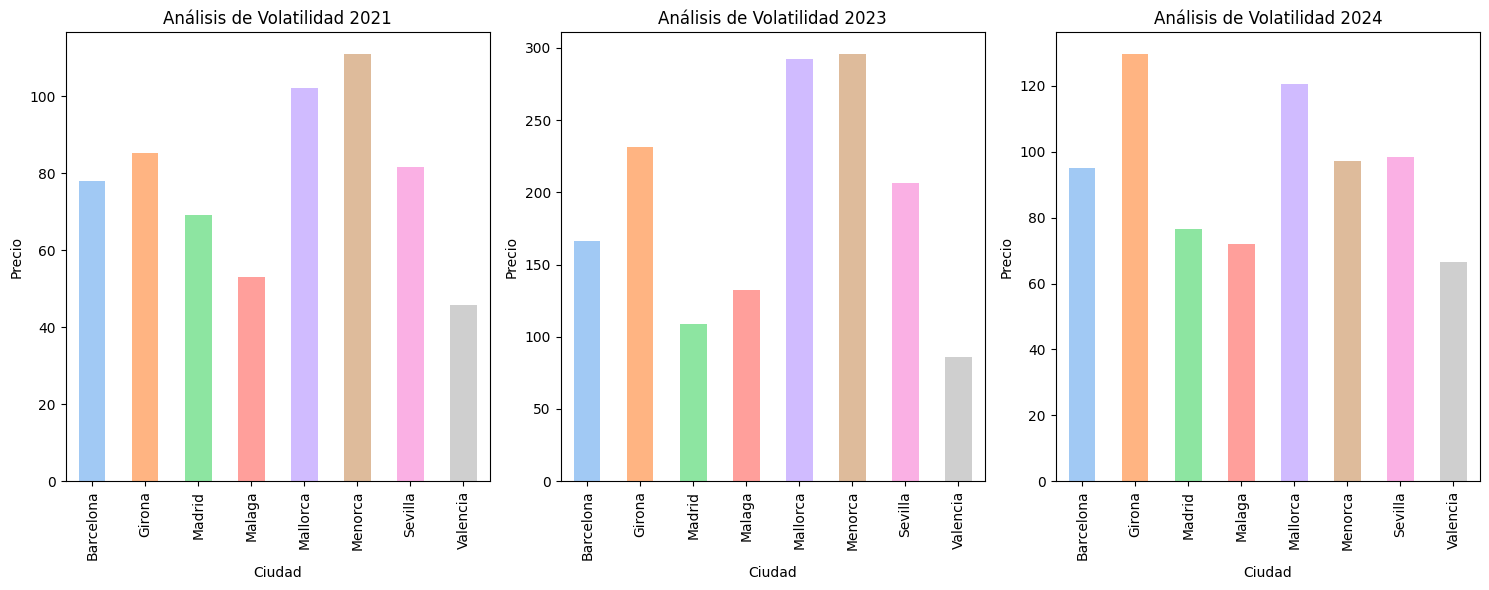

In [211]:
#@title 2.- Análisis de la volatilidad por anualidad (year) de procedencia del dato  y ciudad (city)

#Nota: para este análisis se ha considerado el dataset listings_airbnb_original como df del año 2021

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")  # Otras opciones: 'deep', 'muted', 'bright', 'dark', 'colorblind'

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Gráfico 1: Análisis de volatilidad año 2021
listings_airbnb_original.groupby('city')['price'].std().plot.bar(ax=axes[0], color=sns.color_palette("pastel"))
axes[0].set_title('Análisis de Volatilidad 2021')
axes[0].set_ylabel('Precio')
axes[0].set_xlabel('Ciudad')

# Gráfico 2: Análisis de volatilidad año 2023
listings_airbnb_2023.groupby('city')['price'].std().plot.bar(ax=axes[1], color=sns.color_palette("pastel"))
axes[1].set_title('Análisis de Volatilidad 2023')
axes[1].set_ylabel('Precio')
axes[1].set_xlabel('Ciudad')

# Gráfico 3: Análisis de volatilidad año 2024
listings_airbnb_2024.groupby('city')['price'].std().plot.bar(ax=axes[2], color=sns.color_palette("pastel"))
axes[2].set_title('Análisis de Volatilidad 2024')
axes[2].set_ylabel('Precio')
axes[2].set_xlabel('Ciudad')

# Ajustar el diseño
plt.tight_layout()


-------------------------------------------
Interpretación de los gráficos:

Gráfico 1: Análisis de Volatilidad 2021

    Muestra la volatilidad del precio de los alojamientos en diferentes ciudades durante 2021.
    El eje X muestra las ciudades, mientras que el eje Y muestra el índice de volatilidad.
    Las ciudades con mayor índice de volatilidad son aquellas con mayor variación en el precio de los alojamientos a lo largo del año.
    Observación: Barcelona, Madrid y Málaga son las ciudades con mayor volatilidad en 2021.

Gráfico 2: Análisis de Volatilidad 2023

    Similar al gráfico 1, pero para el año 2023.
    Observación: En 2023, la volatilidad ha aumentado en general, con ciudades como Valencia y Sevilla mostrando un aumento significativo.

Gráfico 3: Análisis de Volatilidad 2024

    Similar al gráfico 1, pero para el año 2024.
    Observación: La volatilidad parece haberse estabilizado en 2024, con Barcelona y Madrid manteniéndose como las ciudades más volátiles.

Interpretaciones adicionales:

    La volatilidad puede estar influenciada por diversos factores como la estacionalidad, la demanda turística, los eventos especiales, etc.
    Es importante analizar la volatilidad junto con otras variables como el precio promedio, la ocupación....
    El análisis de la volatilidad puede ser útil para los propietarios de alojamientos para ajustar sus precios de forma estratégica y para los viajeros para planificar sus viajes de forma más eficiente.

Limitaciones:

    Los gráficos solo muestran una pequeña parte de la información disponible en el conjunto de datos.

-------------------------------------------


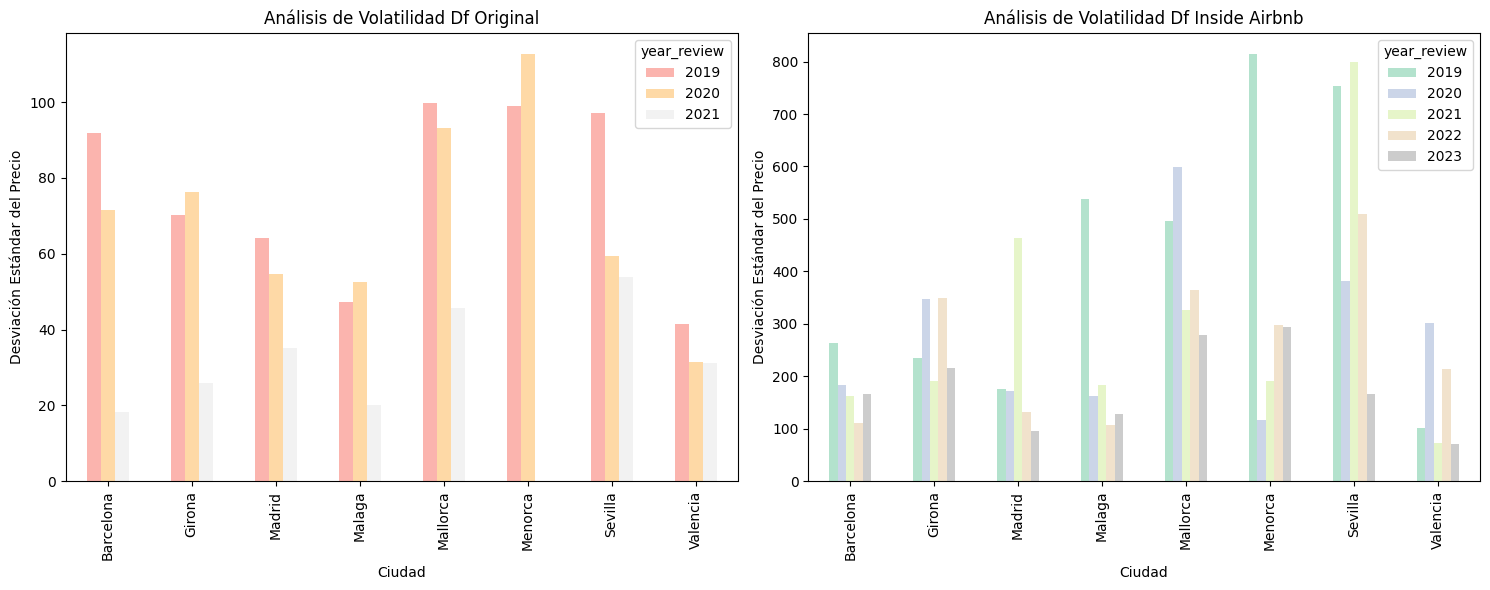

In [212]:
#@title 4.- Análisis de la volatilidad por procedencia de los datos usando el año de last_review >= 2019  y ciudad (city)

#Nota: para este análisis se ha considerado la anualidad de la variable Last_review

# Filtrar el DataFrame por los años después de 2019 para incluir 2021 y 2023
filtered_data_2021 = listings_airbnb_original[listings_airbnb_original['year_review'] >= 2019]
filtered_data_2023 = listings_airbnb_2023[listings_airbnb_2023['year_review'] >= 2019]

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Análisis de volatilidad para el DataFrame original, filtrado para incluir 2021 y adelante
filtered_data_2021.groupby(['city', 'year_review'])['price'].std().unstack().plot(kind='bar', ax=axes[0], colormap='Pastel1')
axes[0].set_title('Análisis de Volatilidad Df Original')
axes[0].set_ylabel('Desviación Estándar del Precio')
axes[0].set_xlabel('Ciudad')

# Gráfico 2: Análisis de volatilidad para el DataFrame de Airbnb 2023, filtrado para incluir 2021 y adelante
filtered_data_2023.groupby(['city', 'year_review'])['price'].std().unstack().plot(kind='bar', ax=axes[1], colormap='Pastel2')
axes[1].set_title('Análisis de Volatilidad Df Inside Airbnb')
axes[1].set_ylabel('Desviación Estándar del Precio')
axes[1].set_xlabel('Ciudad')

# Ajustar el diseño
plt.tight_layout()

# Añadir leyenda
# La leyenda se añade automáticamente al utilizar unstack() y plot(kind='bar'), diferenciando los años en el gráfico.


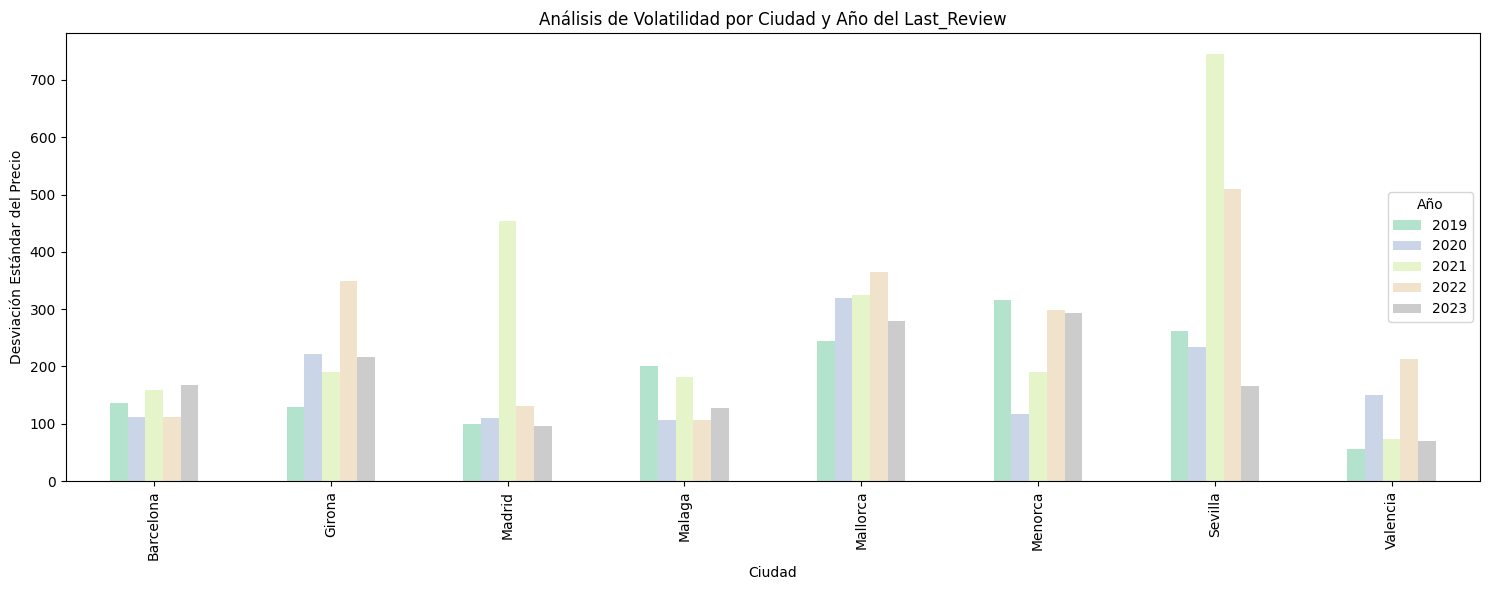

In [213]:


# Concatenar los DataFrames
df_combined = pd.concat([filtered_data_2021, filtered_data_2023], ignore_index=True)

# Agruparpor ciudad y año, y calcular la desviación estándar del precio
df_combined_std = df_combined.groupby(['city', 'year_review'])['price'].std().reset_index()

# Reestructurar el DataFrame para el gráfico
df_combined_std_pivot = df_combined_std.pivot(index='city', columns='year_review', values='price')

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear una figura con un solo subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Usar un gráfico de barras con el DataFrame pivotado
df_combined_std_pivot.plot(kind='bar', ax=ax, colormap='Pastel2')

# Ajustar títulos y etiquetas
ax.set_title('Análisis de Volatilidad por Ciudad y Año del Last_Review')
ax.set_ylabel('Desviación Estándar del Precio')
ax.set_xlabel('Ciudad')

# Agregar leyenda para diferenciar años
ax.legend(title='Año', loc='center right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()#

In [214]:
#@title 3.- Conocer la votalidad (precio) por cada ciudad y año del last_review

volatilidad_por_ciudad_dforiginal = round(filtered_data_2021.groupby('city')['price'].std())

print(f"La volatilidad del dataframe del dforiginal es {volatilidad_por_ciudad_dforiginal}.")

volatilidad_por_ciudad_dfinsideairbnb= round(filtered_data_2023.groupby('city')['price'].std())

print(f"La volatilidad del dataframe del 2023 es {volatilidad_por_ciudad_dfinsideairbnb}.")


La volatilidad del dataframe del dforiginal es city
Barcelona     84.0
Girona        72.0
Madrid        60.0
Malaga        49.0
Mallorca      98.0
Menorca      102.0
Sevilla       85.0
Valencia      38.0
Name: price, dtype: float64.
La volatilidad del dataframe del 2023 es city
Barcelona    166.0
Girona       230.0
Madrid       108.0
Malaga       132.0
Mallorca     293.0
Menorca      297.0
Sevilla      206.0
Valencia      85.0
Name: price, dtype: float64.



**Interpretación**:

* Aumento de la volatilidad: La comparación de los dos gráficos muestra que la volatilidad ha aumentado entre 2021 y 2023. Esto podría deberse a una serie de factores, como la pandemia de COVID-19, la guerra en Ucrania o la inflación.
* Variación por ciudad: La volatilidad también varía según la ciudad. Las ciudades con la mayor volatilidad en 2023 son Barcelona, Madrid y Málaga. Las ciudades con la menor volatilidad en 2023 son Girona, Valencia y Mallorca.
* Relación con "Last_review": No se observa una relación clara entre la volatilidad y la variable "Last_review". Esto podría deberse a que la variable "Last_review" no es un buen indicador de la volatilidad.

**Limitaciones:**

* Falta de datos: El análisis se basa en dos conjuntos de datos, uno de 2021 y otro de 2023. No se dispone de datos para 2022.
* No se incluye DF Scrapping: El análisis no incluye datos de DF Scrapping debido a la falta de información sobre la variable "Last_review

-------------------------------------------


### 2.- Análisis de la estacionalidad

**Para este análisis vamos a usar las variables last_review_date**


**Limitaciones:**

*  Para este analisis asumiremos que todos los inmuebles de procendencia del  DF Scrapping (2024)  tienen como último comentario el mes de enero 2024. Con el objetivo, de demostrar que no es válido para incluirlo en el análisis.



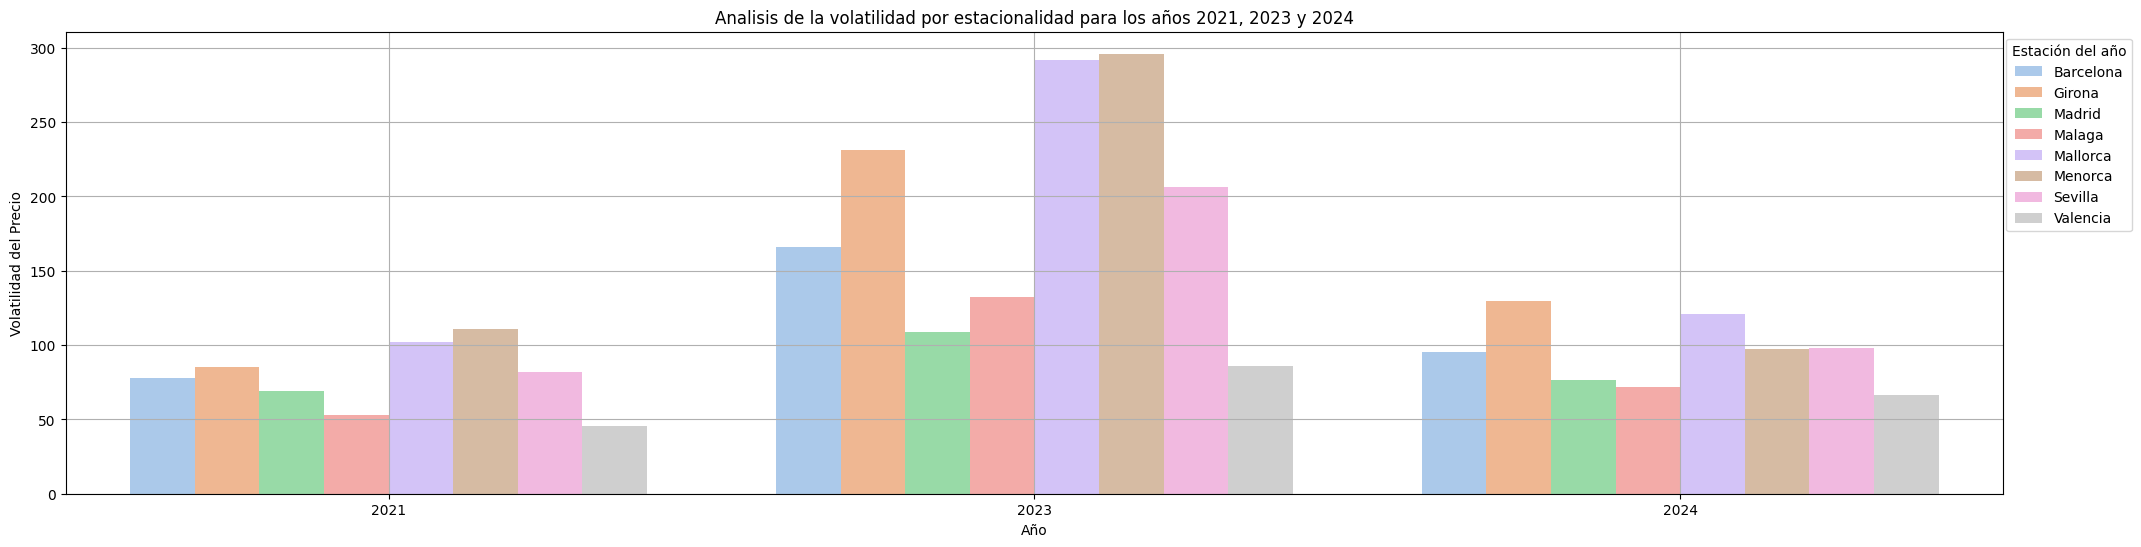

In [215]:
#@title 1.-Gráfico 1. Analisis de la volatilidad por estacionalidad para los años 2021, 2023 y 2024

# Combinar los DataFrames para crear un gráfico único
combined_df_year_df= pd.concat([listings_airbnb_original, listings_airbnb_2023, listings_airbnb_2024])

combined_df_year_df['year_df'] = pd.to_numeric(combined_df_year_df['year_df'], errors='coerce')

# Agrupar por año, y calcula la desviación estándar del precio
volatility_year = combined_df_year_df.groupby(['year_df', 'city'])['price'].std().reset_index()

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear un gráfico de barras
plt.figure(figsize=(25, 6))
sns.barplot(x='year_df', y='price', hue='city', data=volatility_year, ci=None)

plt.title('Analisis de la volatilidad por estacionalidad para los años 2021, 2023 y 2024')
plt.xlabel('Año')
plt.ylabel('Volatilidad del Precio')
plt.legend(title='Estación del año', bbox_to_anchor=(1.07, 1))
plt.grid(True)
plt.show()

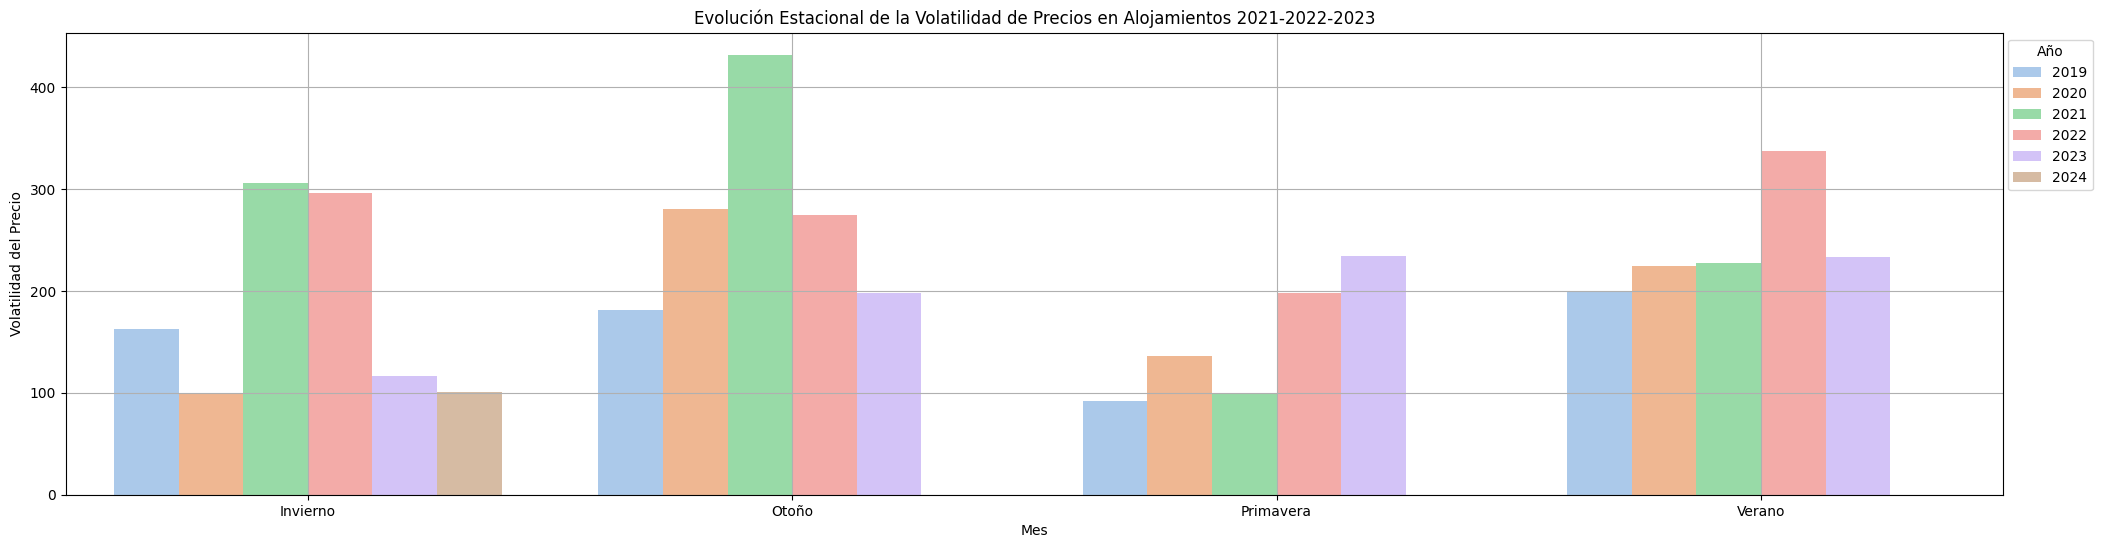

In [216]:
#@title 2.- Gráfico 2. Evolución Estacional de la Volatilidad de Precios en Alojamientos 2021-2022-2023
combined_df_ = pd.concat([listings_airbnb_original, listings_airbnb_2023,listings_airbnb_2024])


combined_df_['year_review'] = pd.to_numeric(combined_df_['year_review'], errors='coerce')
combined_df_['month'] = pd.to_numeric(combined_df_['month'], errors='coerce')

# Filtrar el DataFrame para incluir solo los registros
combined_df_ = combined_df_[combined_df_['year_review'] >= 2019]

# Mapear los meses a las estaciones
seasons = {
    1: 'Invierno', 2: 'Invierno', 3: 'Primavera',
    4: 'Primavera', 5: 'Primavera', 6: 'Verano',
    7: 'Verano', 8: 'Verano', 9: 'Otoño',
    10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
}
combined_df_['Season'] = combined_df_['month'].map(seasons)

# Agruparpor año y mes
monthly_volatility = combined_df_.groupby(['year_review', 'Season'])['price'].std().reset_index()

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear un gráfico de líneas
plt.figure(figsize=(25, 6))
sns.barplot(x='Season', y='price', hue='year_review', data=monthly_volatility, palette="pastel")

plt.title('Evolución Estacional de la Volatilidad de Precios en Alojamientos 2021-2022-2023')
plt.xlabel('Mes')
plt.ylabel('Volatilidad del Precio')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()


Se demuestra que los años de procedencia de los df del 2021 y 2024 son exraído durane el primer trimestre de cada año, y no es representativo.

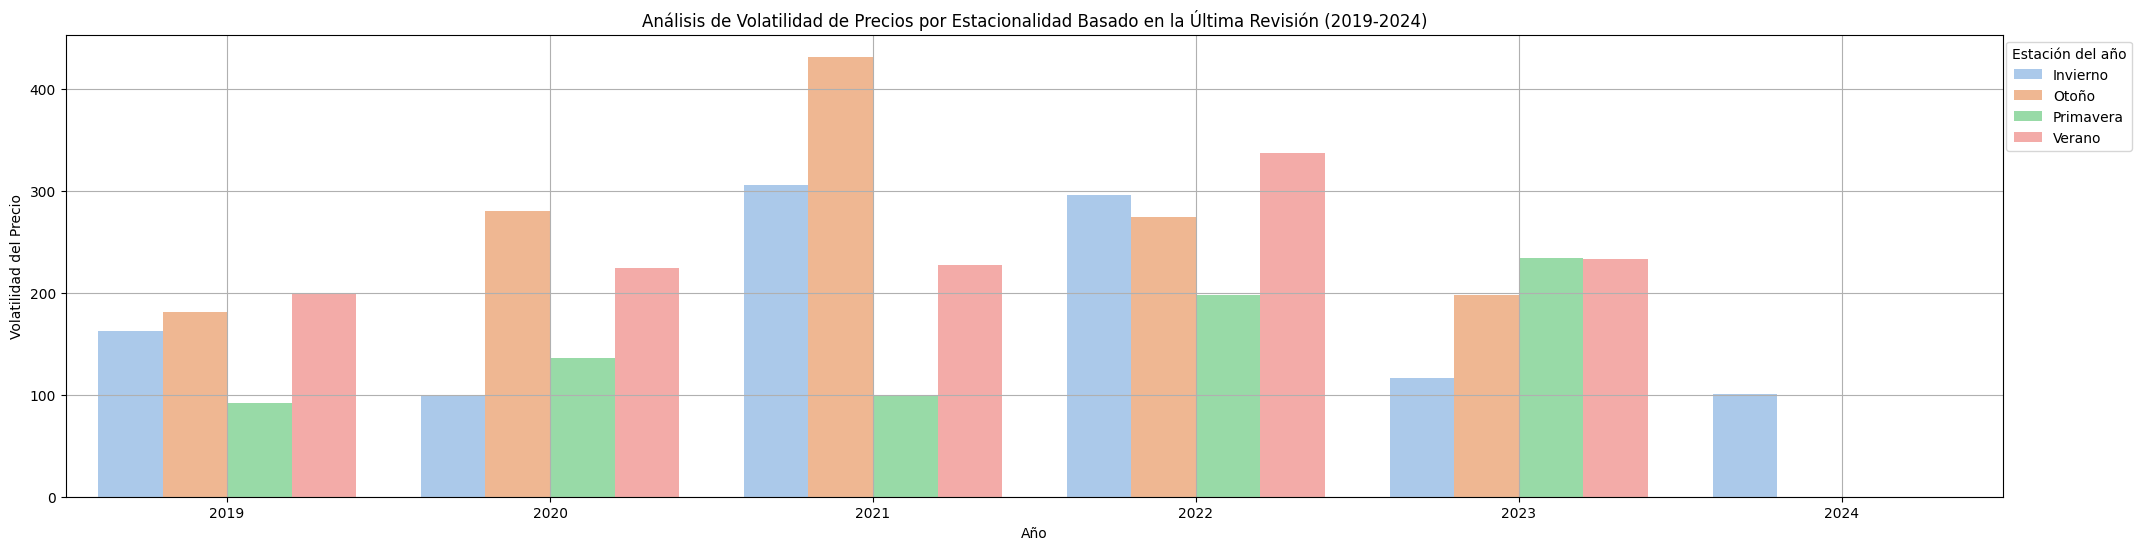

In [217]:
#@title 2.-Gráfico 3. Análisis de Volatilidad de Precios por Estacionalidad Basado en la Última Revisión (2019-2024)



# Combinar los DataFrames para crear un gráfico único
combined_df = pd.concat([listings_airbnb_original, listings_airbnb_2023, listings_airbnb_2024])


combined_df['year_review'] = pd.to_numeric(combined_df['year_review'], errors='coerce')
combined_df['month'] = pd.to_numeric(combined_df['month'], errors='coerce')


# Filtrar el DataFrame para incluir solo los registros
combined_df = combined_df[combined_df['year_review'] >= 2019]


# Mapear los meses a las estaciones
seasons = {
    1: 'Invierno', 2: 'Invierno', 3: 'Primavera',
    4: 'Primavera', 5: 'Primavera', 6: 'Verano',
    7: 'Verano', 8: 'Verano', 9: 'Otoño',
    10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
}
combined_df['Season'] = combined_df['month'].map(seasons)

# Agruparpor año, estación y calcula la desviación estándar del precio
seasonal_volatility = combined_df.groupby(['year_review', 'Season'])['price'].std().reset_index()

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear un gráfico de barras
plt.figure(figsize=(25, 6))
sns.barplot(x='year_review', y='price', hue='Season', data=seasonal_volatility, ci=None)

plt.title('Análisis de Volatilidad de Precios por Estacionalidad Basado en la Última Revisión (2019-2024)')
plt.xlabel('Año')
plt.ylabel('Volatilidad del Precio')
plt.legend(title='Estación del año', bbox_to_anchor=(1.07, 1))
plt.grid(True)
plt.show()


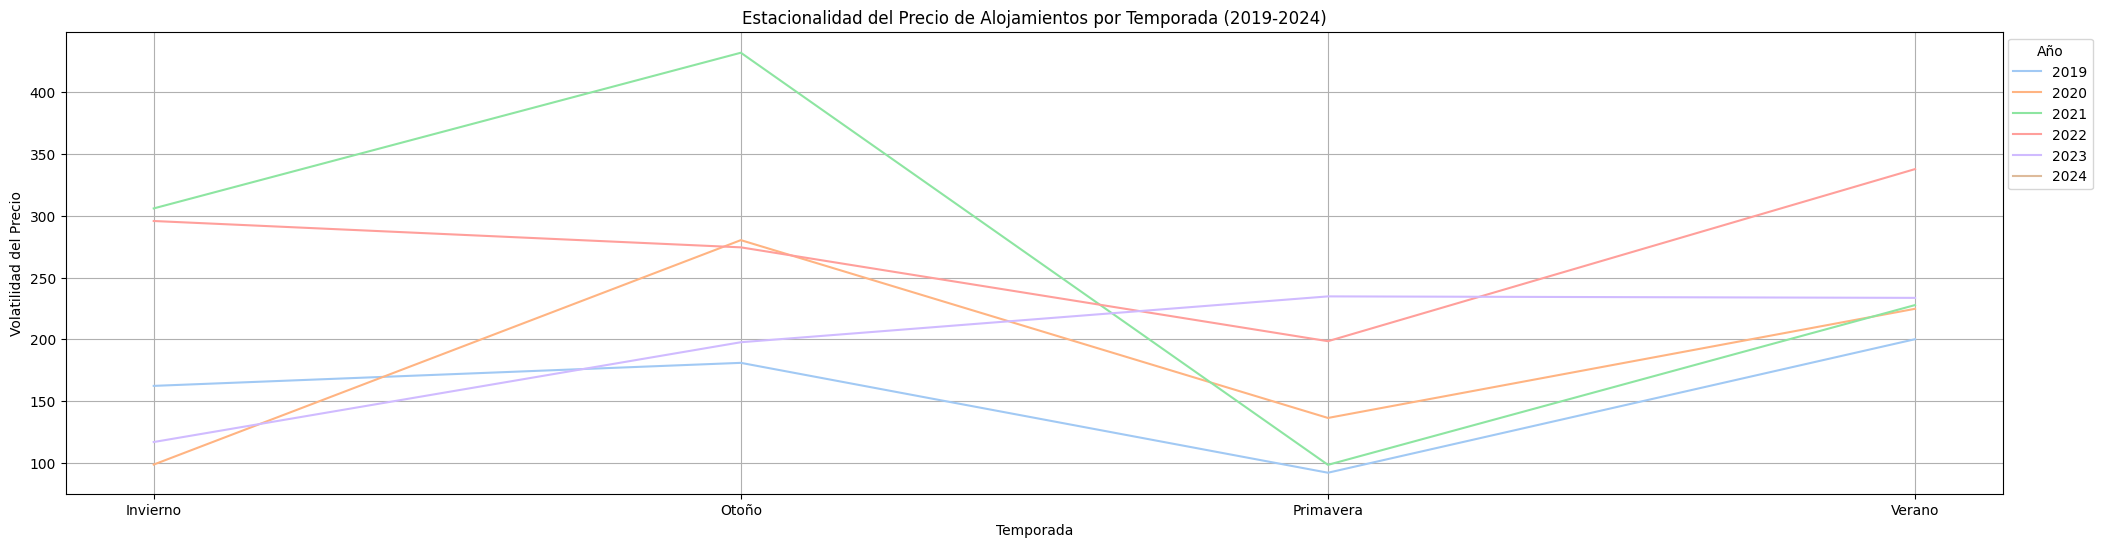

In [218]:
#@title 3.-Gráfico 4. Estacionalidad del Precio de Alojamientos por Temporada (2019-2024)

# Combinar los DataFrames para crear un gráfico único
combined_df = pd.concat([listings_airbnb_original, listings_airbnb_2023, listings_airbnb_2024])



combined_df['year_review'] = pd.to_numeric(combined_df['year_review'], errors='coerce')
combined_df['month'] = pd.to_numeric(combined_df['month'], errors='coerce')


# Filtrar el DataFrame para incluir solo los registros
combined_df = combined_df[combined_df['year_review'] >= 2019]


# Mapear los meses a las estaciones
seasons = {
    1: 'Invierno', 2: 'Invierno', 3: 'Primavera',
    4: 'Primavera', 5: 'Primavera', 6: 'Verano',
    7: 'Verano', 8: 'Verano', 9: 'Otoño',
    10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
}
combined_df['Season'] = combined_df['month'].map(seasons)

# Agruparpor año y mes
monthly_volatility = combined_df.groupby(['year_review', 'Season'])['price'].std().reset_index()

# Crear una paleta de colores cualitativa de Seaborn
sns.set_palette("pastel")

# Crear un gráfico de líneas
plt.figure(figsize=(25, 6))
sns.lineplot(x='Season', y='price', hue='year_review', data=monthly_volatility, palette="pastel")

plt.title('Estacionalidad del Precio de Alojamientos por Temporada (2019-2024)')
plt.xlabel('Temporada')
plt.ylabel('Volatilidad del Precio')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()


**Limitaciones**

* Tal y como se observa el año 2024 tiene más número de comentarios porque se ha asumido que todos los inmuebles extraídos del scrapping tienen un último comentario ese mes.

In [219]:
#@title 4.-Números de comentarios “last_review por año

# Filtramos el DataFrame por comentarios
combined_df_2019 = combined_df[combined_df["year_review"] == 2019]

# Contamos el número de comentarios
numero_comentarios_19 = combined_df_2019.shape[0]
# Filtramos el DataFrame por comentarios
combined_df_2020 = combined_df[combined_df["year_review"] == 2020]

# Contamos el número de comentarios
numero_comentarios_20 = combined_df_2020.shape[0]

# Filtramos el DataFrame por comentarios
combined_df_2021 = combined_df[combined_df["year_review"] == 2021]

# Contamos el número de comentarios
numero_comentarios_21 = combined_df_2021.shape[0]

# Filtramos el DataFrame por comentarios
combined_df_2022 = combined_df[combined_df["year_review"] == 2022]

# Contamos el número de comentarios
numero_comentarios_22 = combined_df_2022.shape[0]

# Filtramos el DataFrame por comentarios
combined_df_2023 = combined_df[combined_df["year_review"] == 2023]

# Contamos el número de comentarios
numero_comentarios_23 = combined_df_2023.shape[0]

# Filtramos el DataFrame por comentarios
combined_df_2024 = combined_df[combined_df["year_review"] == 2024]

# Contamos el número de comentarios
numero_comentarios_24 = combined_df_2024.shape[0]

# Imprimimos el resultado
print(f"Número de comentarios con fecha 2019: {numero_comentarios_19}")

# Imprimimos el resultado
print(f"Número de comentarios con fecha 2020: {numero_comentarios_20}")
# Imprimimos el resultado
print(f"Número de comentarios con fecha 2021: {numero_comentarios_21}")

# Imprimimos el resultado
print(f"Número de comentarios con fecha 2022: {numero_comentarios_22}")

# Imprimimos el resultado
print(f"Número de comentarios con fecha 2023: {numero_comentarios_23}")

# Imprimimos el resultado
print(f"Número de comentarios con fecha 2024: {numero_comentarios_24}")


Número de comentarios con fecha 2019: 2924
Número de comentarios con fecha 2020: 1902
Número de comentarios con fecha 2021: 799
Número de comentarios con fecha 2022: 3308
Número de comentarios con fecha 2023: 60680
Número de comentarios con fecha 2024: 2837


In [220]:
#@title 5.-La volatilidad de los precios según el año  “last_review”


# Calcular la volatilidad por año
precio_estandar_2019 = round(combined_df_2019['price'].std())
precio_estandar_2020 = round(combined_df_2020['price'].std())
precio_estandar_2021 = round(combined_df_2021['price'].std())
precio_estandar_2022 = round(combined_df_2022['price'].std())
precio_estandar_2023 = round(combined_df_2023['price'].std())
precio_estandar_2024 = round(combined_df_2024['price'].std())

# Imprimir resultados
print(f"La volatilidad del dataframe 2019 es {precio_estandar_2019}.")
print(f"La volatilidad del dataframe 2020 es {precio_estandar_2020}.")
print(f"La volatilidad del dataframe 2021 es {precio_estandar_2021}.")
print(f"La volatilidad del dataframe 2022 es {precio_estandar_2022}.")
print(f"La volatilidad del dataframe 2023 es {precio_estandar_2023}.")
print(f"La volatilidad del dataframe 2024 es {precio_estandar_2024}.")


La volatilidad del dataframe 2019 es 172.
La volatilidad del dataframe 2020 es 179.
La volatilidad del dataframe 2021 es 326.
La volatilidad del dataframe 2022 es 298.
La volatilidad del dataframe 2023 es 187.
La volatilidad del dataframe 2024 es 101.


## Crea un dataset único de verdad

### Conclusiones

[Concusiones finales dataset único](https://docs.google.com/document/d/1lLBZG5B0D6N9pZr5-cuFz4PEi4LS_3b33MrBIqQ95wo/edit)

In [221]:
print(listings_airbnb_original.columns)

Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date', 'rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_instant_bookable', 'reviews_per_month', 'country', 'city',
       'insert_date', 'price_cat', 'bedrooms_cat', 'bathrooms_cat', 'beds_cat',
       'dias_reservado', 'rentabilidad', 'last_review_month',
       'last_review_year', 'rango_precio', 'month', 'year_review', 'year_df',
       'rating_cat']

In [222]:

#@title Convertir las columnas a un tipo de datos común
listings_airbnb_original = listings_airbnb_original.astype(str)
listings_airbnb_2023 = listings_airbnb_2023.astype(str)
listings_airbnb_2024 = listings_airbnb_2024.astype(str)

# Primero, unir df original y listings_airbnb_2023 en base a las columnas comunes
df_unido = pd.merge(listings_airbnb_original, listings_airbnb_2023, how='outer', on=['apartment_id', 'name', 'host_id', 'latitude', 'longitude', 'room_type', 'price', 'city', 'year_df', 'beds', 'bathrooms', 'bedrooms'])


# Ahora puedes unir los dataframes
df_unido = pd.concat([listings_airbnb_original, listings_airbnb_2023, listings_airbnb_2024], ignore_index=True)

# Luego,  unir df_unido y listings_airbnb_2024
df_unido = pd.merge(df_unido, listings_airbnb_2024, how='outer', on=['name', 'rating', 'price', 'apartment_id', 'city', 'year_df', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type'])

# Ahora df_unido es la unión de los tres dataframes

In [223]:
print("\nColumnas en df unido:")
print(df_unido.columns)


Columnas en df unido:
Index(['apartment_id', 'md5', 'name', 'description', 'host_id',
       'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review_date', 'last_review_date', 'rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_instant_bookable', 'reviews_per_month', 'country', 'city',
       'insert_date', 'price_cat', 'bedrooms_cat', 'bathrooms_cat', 'beds_cat',
       'dias_reservado', 'rentabilidad', 'last_review_month',
       'last_review_year', 'rango_precio', 'month_x', 'year_review_x',
    

### Hipotesis:

Si el df original tiene más columnas que los otros dos df, al unirlo se nos van a generar muchas filas NaN, por tanto nos va a crear un df muy grande, y que cuando subamos a Power Bi, nos va a resultar complicado trabajar con él, y afectará al rendimiento.

**Propuesta para afrontar esta hipotesis:**

Unir un df único con los otros tres df teniendo en cuenta las columnas comunes, sinend la Tabla de hechos y crear otro df que se subirá a Power Bi con las columnas adicionales, siendo una nueva Tabla de dimensiones

In [224]:
#@title Crear las tablas dinamcas

# Primero, identificar las columnas comunes a los tres dataframes
columnas_comunes = listings_airbnb_original.columns.intersection(listings_airbnb_2023.columns).intersection(listings_airbnb_2024.columns)

# Crear la tabla de hechos con las columnas comunes
tabla_hechos = pd.concat([listings_airbnb_original[columnas_comunes], listings_airbnb_2023[columnas_comunes], listings_airbnb_2024[columnas_comunes]])

# Luego, crear la tabla de dimensiones con las columnas adicionales
columnas_union = listings_airbnb_original.columns.union(listings_airbnb_2023.columns).union(listings_airbnb_2024.columns)
#Identificar las columnas adicionales, excluyendo 'apartment_id' para evitar duplicados
columnas_adicionales = columnas_union.difference(columnas_comunes.difference(['apartment_id','year_df']))


In [225]:
print("\nColumnas comunes a los tres dataframes")

print(columnas_comunes)


Columnas comunes a los tres dataframes
Index(['apartment_id', 'name', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'price', 'rating', 'city', 'month', 'year_review', 'year_df'],
      dtype='object')


In [226]:
# Reemplazar 'nan' por cadenas vacías solo en la columna 'bathrooms'
tabla_hechos['bathrooms'].replace('nan', '', inplace=True)


In [227]:
tabla_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77814 entries, 0 to 2836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   apartment_id  77814 non-null  object
 1   name          77814 non-null  object
 2   room_type     77814 non-null  object
 3   bathrooms     77814 non-null  object
 4   bedrooms      77814 non-null  object
 5   beds          77814 non-null  object
 6   price         77814 non-null  object
 7   rating        77814 non-null  object
 8   city          77814 non-null  object
 9   month         77814 non-null  object
 10  year_review   77814 non-null  object
 11  year_df       77814 non-null  object
dtypes: object(12)
memory usage: 7.7+ MB


In [228]:
apartment_id_especifico = 'Mallorca'  # Asumiendo que es un valor en la columna apartment_id del DataFrame
apartamento_filtrado = tabla_hechos.query(f"rating == '{apartment_id_especifico}'")
print(apartamento_filtrado)


Empty DataFrame
Columns: [apartment_id, name, room_type, bathrooms, bedrooms, beds, price, rating, city, month, year_review, year_df]
Index: []


In [229]:
tabla_hechos['bathrooms'] = pd.to_numeric(tabla_hechos['bathrooms'], errors='coerce')


In [230]:
print(tabla_hechos['bathrooms'].value_counts())


1     47516
2     17460
5      7362
3      3569
4      1199
0       397
6       167
7        62
8        54
9         9
11        6
10        5
12        5
13        2
15        1
Name: bathrooms, dtype: int64


In [231]:
#@title Agruparpor la columna 'Tipo de Tasa' de la tabla ipap y contar el número de filas en cada grupo
summary = tabla_hechos.groupby('bathrooms').size()

# Mostrar el resumen Agrupardo
summary

bathrooms
0       397
1     47516
2     17460
3      3569
4      1199
5      7362
6       167
7        62
8        54
9         9
10        5
11        6
12        5
13        2
15        1
dtype: int64

In [232]:
#@title  Eliminar la columna 'month' de las columnas comunes
columnas_comunes = columnas_comunes.drop('month')


In [233]:
print("\nColumnas comunes a los tres dataframes")

print(columnas_comunes)


Columnas comunes a los tres dataframes
Index(['apartment_id', 'name', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'price', 'rating', 'city', 'year_review', 'year_df'],
      dtype='object')


In [234]:
#@title Tras la revisión de las columnas comunes, se identificaron las columnas adicionales

In [235]:

#@title  Verificar la existencia de las columnas antes de seleccionarlas
columnas_adicionales_listings_airbnb_original = columnas_adicionales.intersection(listings_airbnb_original.columns)
columnas_adicionales_listings_airbnb_2023 = columnas_adicionales.intersection(listings_airbnb_2023.columns)
columnas_adicionales_listings_airbnb_2024 = columnas_adicionales.intersection(listings_airbnb_2024.columns)

print("\nColumnas adicionales del df original:")
print(columnas_adicionales_listings_airbnb_original)

print("\nColumnas adicionales del df 2023:")
print(columnas_adicionales_listings_airbnb_2023)

print("\nColumnas adicionales del df 2024:")
print(columnas_adicionales_listings_airbnb_2024)




Columnas adicionales del df original:
Index(['accommodates', 'amenities_list', 'apartment_id', 'availability_30',
       'availability_365', 'availability_60', 'availability_90',
       'bathrooms_cat', 'bedrooms_cat', 'beds_cat', 'country', 'description',
       'dias_reservado', 'first_review_date', 'has_availability', 'host_id',
       'insert_date', 'is_instant_bookable', 'last_review_date',
       'last_review_month', 'last_review_year', 'latitude', 'license',
       'longitude', 'maximum_nights', 'md5', 'minimum_nights',
       'neighborhood_overview', 'neighbourhood_district', 'neighbourhood_name',
       'number_of_reviews', 'price_cat', 'rango_precio', 'rating_cat',
       'rentabilidad', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'year_df'],
      dtype='object')

Columnas adicionales del df 2023:
Index(['apartment_id'

In [236]:
#@title  Seleccionar solo las columnas que existen en cada dataframe
tabla_dimensiones = pd.concat([listings_airbnb_original[columnas_adicionales_listings_airbnb_original], listings_airbnb_2023[columnas_adicionales_listings_airbnb_2023], listings_airbnb_2024[columnas_adicionales_listings_airbnb_2024]])

In [237]:

#@title Eliminar múltiples columnas de 'tabla_dimensiones'
columnas_a_eliminar = ['amenities_list', 'availability_30', 'availability_60', 'availability_90', 'review_scores_accuracy',
                       'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
                       'review_scores_value', 'reviews_per_month', 'is_instant_bookable', 'subtitulo', 'rentabilidad', 'md5', 'country', 'has_availability','subtitulo','number_of_reviews','insert_date', 'last_review_month', 'last_review_year']

tabla_dimensiones = tabla_dimensiones.drop(columns=columnas_a_eliminar)

print("\nColumnas adicionales a los tres dataframes")
print(tabla_dimensiones.columns)



Columnas adicionales a los tres dataframes
Index(['accommodates', 'apartment_id', 'availability_365', 'bathrooms_cat',
       'bedrooms_cat', 'beds_cat', 'description', 'dias_reservado',
       'first_review_date', 'host_id', 'last_review_date', 'latitude',
       'license', 'longitude', 'maximum_nights', 'minimum_nights',
       'neighborhood_overview', 'neighbourhood_district', 'neighbourhood_name',
       'price_cat', 'rango_precio', 'rating_cat', 'year_df', 'last_review',
       'location', 'neighbourhood'],
      dtype='object')


In [238]:
tabla_hechos

,apartment_id,name,room_type,bathrooms,bedrooms,beds,price,rating,city,month,year_review,year_df
0,590991,Beautiful Cheap Double NEAR BEACH!!,Private room,2,1,1,80.0,5.0,Barcelona,11,2012,2021
1,814226,Mar Bella 10,Entire home/apt,2,3,3,120.0,4.5,Barcelona,5,2013,2021
2,759577,Sofa Bed with charming balcony view,Private room,2,1,2,49.0,5.0,Madrid,8,2013,2021
3,1169229,SAG.FAMILIA ZONE! RENOVATED FLAT =),Private room,1,2,0,100.0,3.0,Barcelona,9,2013,2021
4,1444019,Near Sagrada Familia Encants Plus,Entire home/apt,2,3,5,146.0,5.0,Barcelona,6,2014,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2832,938794458000955134,Vivienda en València,Entire home/apt,1,1,1,116.0,nan,Valencia,1,2024,2024
2833,1062285731960801996,Vivienda en València,Entire home/apt,2,2,1,139.0,nan,Valencia,1,2024,2024
2834,939762769551098026,Vivienda en València,Entire home/apt,1,2,2,123.0,nan,Valencia,1,2024,2024
2835,36745775,Vivienda en Valencia,Entire home/apt,2,2,3,148.0,nan,Valencia,1,2024,2024


In [239]:
# Contar los valores duplicados específicamente para la columna "apartamento_ID"


# Paso 1: Contar los valores duplicados específicamente para la columna "apartment_id"
duplicados_apartamento_ID = tabla_hechos['apartment_id'].duplicated().sum()
print(duplicados_apartamento_ID)

# Paso 2: Seleccionar solo las filas duplicadas, excluyendo la primera aparición de cada duplicado.
duplicados_df = tabla_hechos[tabla_hechos['apartment_id'].duplicated(keep='first')]

# Paso 3: Exportar los duplicados a un archivo CSV.
duplicados_df.to_csv('duplicados_apartamento_ID.csv', index=False)



4115


Los duplicados al unificar los tres DataFrames (4115) incluyen todos los apartment_id duplicados, sin importar entre cuántos DataFrames se repitan. No es simplemente la suma de coincidencias únicas entre pares de DataFrames porque algunos apartment_id pueden estar duplicados en más de dos DataFrames.

In [240]:
#@title Calcular el total de apariciones de combinaciones únicas de apartment_id sobre la tabla de hechos


# Agruparpor 'apartment_id' y contar las ocurrencias de cada uno
conteo_por_apartamento = tabla_hechos.groupby('apartment_id').size()

# Filtrar aquellos apartamentos que tienen más de una ocurrencia (duplicados)
duplicados_apartamento_ID_unicos = conteo_por_apartamento[conteo_por_apartamento > 1]

# Convertir los duplicados en un DataFrame con una sola columna
duplicados_apartamento_ID_unicos = duplicados_apartamento_ID_unicos.reset_index(name='count')

#Calcular el total de apariciones de combinaciones únicas de apartment_id y rating sobre la tabla de hechos

total_apariciones_unicas = len(duplicados_apartamento_ID_unicos)

# Imprimir el total

print(f"Total de apariciones únicas de combinaciones de apartment_id entre los tres dataframes: {total_apariciones_unicas}")

# Guardar los duplicados en un archivo CSV
duplicados_apartamento_ID_unicos.to_csv('duplicados_apartamento_ID_unicos.csv', index=False)

Total de apariciones únicas de combinaciones de apartment_id entre los tres dataframes: 4047


In [241]:
# Agruparpor 'apartment_id' y 'rating', y contar las ocurrencias de cada combinación
conteo_por_valoracion = tabla_hechos.groupby(['apartment_id', 'rating']).size()

# Filtrar aquellos apartamentos que tienen más de una ocurrencia para la misma valoración
duplicados_con_misma_valoracion = conteo_por_valoracion[conteo_por_valoracion > 1]


# Convertir los duplicados en un DataFrame con una sola columna
duplicados_con_misma_valoracion = duplicados_con_misma_valoracion.reset_index(name='count')

# Guardar los duplicados en un archivo CSV
duplicados_con_misma_valoracion.to_csv('duplicados_con_misma_valoracion.csv', index=False)

In [242]:
#@title Calcular el total de apariciones de combinaciones únicas de apartment_id y rating sobre la tabla de hechos

# Agruparpor 'apartment_id' y 'rating', contar las filas para cada grupo
duplicados_con_misma_valoracion = tabla_hechos.groupby(['apartment_id', 'rating']).size().reset_index(name='count')

# Filtrar aquellos grupos que tienen más de una fila (duplicados con la misma valoración)
duplicados_con_misma_valoracion = duplicados_con_misma_valoracion[duplicados_con_misma_valoracion['count'] > 1]

#Calcular el total de apariciones de combinaciones únicas de apartment_id y rating sobre la tabla de hechos

total_apariciones_unicas = len(duplicados_con_misma_valoracion)


# Imprimir el total

print(f"Total de apariciones únicas de combinaciones de apartment_id y rating: {total_apariciones_unicas}")

# Exportar los duplicados a un archivo CSV.
duplicados_con_misma_valoracion.to_csv('total_apariciones_unicas.csv', index=False)


Total de apariciones únicas de combinaciones de apartment_id y rating: 384


In [243]:
print(tabla_hechos.columns)
print(tabla_dimensiones.columns)

Index(['apartment_id', 'name', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'price', 'rating', 'city', 'month', 'year_review', 'year_df'],
      dtype='object')
Index(['accommodates', 'apartment_id', 'availability_365', 'bathrooms_cat',
       'bedrooms_cat', 'beds_cat', 'description', 'dias_reservado',
       'first_review_date', 'host_id', 'last_review_date', 'latitude',
       'license', 'longitude', 'maximum_nights', 'minimum_nights',
       'neighborhood_overview', 'neighbourhood_district', 'neighbourhood_name',
       'price_cat', 'rango_precio', 'rating_cat', 'year_df', 'last_review',
       'location', 'neighbourhood'],
      dtype='object')


In [244]:

# #@title Renombrar las columnas de los dataframes en español

# tabla_hechos = tabla_hechos.rename(columns={
#     'apartment_id': 'id_apartamento',
#     'name': 'nombre',
#     'room_type': 'tipo_habitacion',
#     'bathrooms': 'baños',
#     'bedrooms': 'habitaciones',
#     'beds': 'camas',
#     'price': 'precio',
#     'rating': 'calificacion',
#     'city': 'ciudad',
#     'month': 'mes_último_comentario',
#     'year_review': 'año_último_comentario',
#     'year_df': 'año_df'
# })


# tabla_dimensiones = tabla_dimensiones.rename(columns={
#     'accommodates': 'viajeros',
#     'apartment_id': 'id_apartamento',
#     'availability_365': 'disponibilidad_365',
#     'bathrooms_cat': 'baños_cat',
#     'bedrooms_cat': 'habitaciones_cat',
#     'beds_cat': 'camas_cat',
#     'description': 'descripción',
#     'dias_reservado': 'días_reservados',
#     'first_review_date': 'fecha_primer_comentario',
#     'host_id': 'id_anfitrión',
#     'last_review_date': 'fecha_último_comentario',
#     'latitude': 'latitud',
#     'license': 'licencia',
#     'longitude': 'longitud',
#     'maximum_nights': 'noches_max',
#     'minimum_nights': 'noches_min',
#     'neighborhood_overview': 'vision_barrio',
#     'neighbourhood_district': 'distrito_barrio',
#     'neighbourhood_name': 'nombre_barrio',
#     'price_cat': 'precio_cat',
#     'rango_precio': 'rango_precio',
#     'rating_cat': 'calificación_cat',
#     'last_review': 'último_comentario',
#     'location': 'ubicación',
#     'neighbourhood': 'barrio'
# })

# 4. Guardar el dataframe

In [251]:

#@title Guardar los resultados en un DataFrame

tabla_hechos= pd.DataFrame(tabla_hechos)
tabla_dimensiones_informacion_adicional = pd.DataFrame(tabla_dimensiones)

# Ruta donde deseas guardar el archivo CSV en Google Drive (nombre único con marca de tiempo)
nombre_archivo_1 = f'tabla_hechos.csv'
nombre_archivo_2 = f'tabla_dimensiones_informacion_adicional.csv'
ruta_guardado_1 = f'/content/drive/MyDrive/Hosting/Hosting/Power BI/{nombre_archivo_1}'
ruta_guardado_2= f'/content/drive/MyDrive/Hosting/Hosting/Power BI/{nombre_archivo_2}'

# Guardar el DataFrame en un archivo CSV único basado en la marca de tiempo en Google Drive
tabla_hechos.to_csv(ruta_guardado_1, encoding='utf-16', index=False,decimal=',')
print(f"Archivo CSV único con marca de tiempo guardado en: {ruta_guardado_1}")

tabla_dimensiones_informacion_adicional.to_csv(ruta_guardado_2, encoding='utf-16', index=False,decimal=',')
print(f"Archivo CSV único con marca de tiempo guardado en: {ruta_guardado_2}")

Archivo CSV único con marca de tiempo guardado en: /content/drive/MyDrive/Hosting/Hosting/Power BI/tabla_hechos.csv
Archivo CSV único con marca de tiempo guardado en: /content/drive/MyDrive/Hosting/Hosting/Power BI/tabla_dimensiones_informacion_adicional.csv
